In [118]:
import numpy as np
import pandas as pd
!pip install plotnine
!conda install -c conda-forge --yes plotnine
#try:
 #   import plotnine
#except:
 #   import pip
  #  pip.main(['install','plotnine'])
   # import plotnine
#from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import seaborn as sns
#from IPython.display import Image  
#import pydotplus
#from plotnine.data import mpg
#from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
#from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
#from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
#from plotnine import geom_text, position_stack
#from scipy.stats import norm, kde
import matplotlib
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [119]:
#DATASET CRIMEN
path = '/Bueno.csv'
dfc=pd.read_csv(path, index_col = False, sep=',', encoding='latin-1', on_bad_lines='skip')


In [120]:
dfc.shape

(52607, 29)

In [121]:
dfc.columns

Index(['ï»¿ID_ENTIDAD', 'ID_MUNICIPIO', 'municipio', 'Total', 'pea', 'estado',
       'poblacion', 'pobreza_pob', 'Pobreza_por', 'NOM_LOC', 'POBTOT',
       'P_12YMAS', 'P_15A17', 'P_18A24', 'P15A17A', 'P18A24A', 'P15PRI_CO',
       'P18YM_PB', 'POCUPADA', 'PDER_SS', 'VIVTOT', 'VPH_PISODT', 'VPH_C_ELEC',
       'VPH_AEASP', 'VPH_EXCSA', 'VPH_DRENAJ', 'VPH_DSADMA', 'VPH_REFRI',
       'VPH_LAVAD'],
      dtype='object')

In [122]:
dfc.head()

,ï»¿ID_ENTIDAD,ID_MUNICIPIO,municipio,Total,pea,estado,poblacion,pobreza_pob,Pobreza_por,NOM_LOC,...,PDER_SS,VIVTOT,VPH_PISODT,VPH_C_ELEC,VPH_AEASP,VPH_EXCSA,VPH_DRENAJ,VPH_DSADMA,VPH_REFRI,VPH_LAVAD
0,1,1,Aguascalientes,79713,336974,Aguascalientes,861446,224949,0.26,Total del Municipio,...,774363,313256,264662,265785,254151,265261,265392,264988,254959,234193
1,1,1,Aguascalientes,79713,336974,Aguascalientes,861446,224949,0.26,Total del Municipio,...,774363,313256,264662,265785,254151,265261,265392,264988,254959,234193
2,1,1,Aguascalientes,79713,336974,Aguascalientes,861446,224949,0.26,Total del Municipio,...,774363,313256,264662,265785,254151,265261,265392,264988,254959,234193
3,1,2,Asientos,1535,14319,Aguascalientes,46624,25169,0.54,Total del Municipio,...,43922,15353,12330,12420,7637,11968,12067,11928,11071,10306
4,1,2,Asientos,1535,14319,Aguascalientes,46624,25169,0.54,Total del Municipio,...,43922,15353,12330,12420,7637,11968,12067,11928,11071,10306


In [123]:
#pd.set_option('display.max_rows', df2.shape[0]+1)
df2 = dfc.drop_duplicates(subset=['ID_MUNICIPIO'])

In [125]:
#df_c.dropna(subset= ["Total"], inplace=True) 
df2.shape

(2191, 29)

In [126]:
df2.head(10)

,ï»¿ID_ENTIDAD,ID_MUNICIPIO,municipio,Total,pea,estado,poblacion,pobreza_pob,Pobreza_por,NOM_LOC,...,PDER_SS,VIVTOT,VPH_PISODT,VPH_C_ELEC,VPH_AEASP,VPH_EXCSA,VPH_DRENAJ,VPH_DSADMA,VPH_REFRI,VPH_LAVAD
0,1,1,Aguascalientes,79713,336974,Aguascalientes,861446,224949,0.26,Total del Municipio,...,774363,313256,264662,265785,254151,265261,265392,264988,254959,234193
3,1,2,Asientos,1535,14319,Aguascalientes,46624,25169,0.54,Total del Municipio,...,43922,15353,12330,12420,7637,11968,12067,11928,11071,10306
6,1,3,Calvillo,4313,19310,Aguascalientes,52773,29951,0.57,Total del Municipio,...,46370,20842,15336,15398,13788,15378,15407,15373,14659,13560
9,1,4,CosÃ­o,1446,4819,Aguascalientes,15321,6620,0.43,Total del Municipio,...,14651,4845,3891,3906,2287,3842,3884,3843,3518,3203
12,1,5,JesÃºs MarÃ­a,10370,39315,Aguascalientes,125750,31479,0.25,Total del Municipio,...,102428,41550,32719,32977,28396,32817,32867,32745,31414,29188
20,14,572,JesÃºs MarÃ­a,10370,39315,Aguascalientes,125750,31479,0.25,Total del Municipio,...,102428,41550,32719,32977,28396,32817,32867,32745,31414,29188
44,1,6,PabellÃ³n de Arteaga,57038,14892,Aguascalientes,45733,15972,0.35,Total del Municipio,...,38733,13541,11350,11361,10932,11279,11326,11267,10673,9958
47,1,7,RincÃ³n de Romos,3181,17249,Aguascalientes,50895,25483,0.50,Total del Municipio,...,45805,16527,13337,13422,11963,13239,13309,13212,12388,11214
50,1,8,San JosÃ© de Gracia,951,2863,Aguascalientes,8768,5228,0.60,Total del Municipio,...,8300,3410,2354,2345,2116,2306,2315,2303,2143,1977
53,1,9,TepezalÃ¡,1739,6413,Aguascalientes,20484,10378,0.51,Total del Municipio,...,19068,6592,5310,5355,3978,5256,5296,5254,4916,4547


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


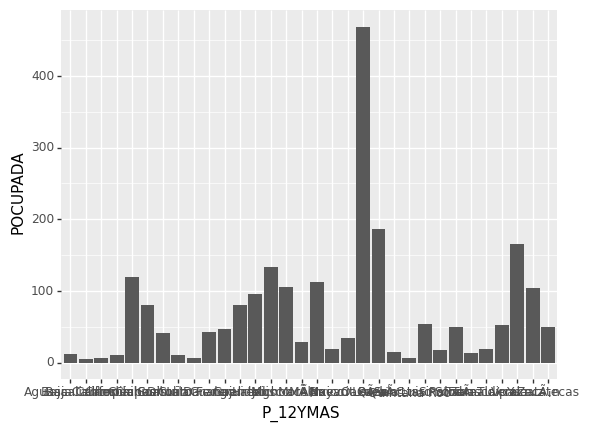

<ggplot: (8759645526689)>

In [135]:
class_freq = pd.DataFrame(df2.groupby(["estado"]).size().reset_index())
class_freq.columns = ["P_12YMAS", "POCUPADA"]
ggplot(class_freq) + aes(x="P_12YMAS", y="POCUPADA") + geom_col()


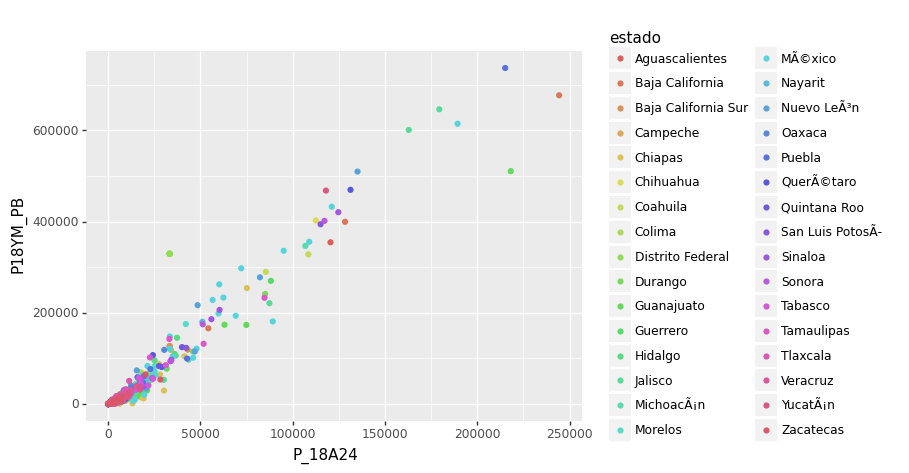

<ggplot: (8759645410621)>

In [137]:
(
    ggplot(df2) 
    + aes(x="P_18A24", y="P18YM_PB", color="estado")
    + geom_point()
    + scale_x_continuous() 
    + scale_y_continuous()
    + scale_colour_discrete()
)

In [127]:
#df2.iat[0,3]
#df2.shape[1]
print(df2.iat[0,2])#municipio
print(df2.iat[0,3])#total crimen
print(df2.iat[0,4])#pea
print(df2.iat[0,8])#porcentaje pobreza
print(df2.iat[0,10])#poblacion total
print(df2.iat[0,11])#poblacion 12ymas
print(df2.iat[0,12])#poblacion 15a17
print(df2.iat[0,13])#poblacion 18a24
print(df2.iat[0,14])#poblacion escuela15a17
print(df2.iat[0,15])#poblacion escuela18a24
print(df2.iat[0,16])#poblacion 15ymascon primaria
print(df2.iat[0,17])#poblacion 18ymas posbasica
print(df2.iat[0,18])#poblacion 12ymasocupada
print(df2.iat[0,19])#poblacion afiliadaserviciosdesalud
print(df2.iat[0,20])#poblacion vivendatot
print(df2.iat[0,21])#poblacion vivpisodiftierra
print(df2.iat[0,22])#poblacion vivelectricidad
print(df2.iat[0,23])#poblacion viv agua del servicio publico
print(df2.iat[0,24])#poblacion viv excusado
print(df2.iat[0,25])#poblacion viv drenaje
print(df2.iat[0,26])#poblacion viv drenaje con agua
print(df2.iat[0,27])#poblacion viv refri
print(df2.iat[0,28])#poblacion viv lavadora

Aguascalientes
79713
336974
0.26
948990
756970
49934
120452
36490
44885
76256
354455
476502
774363
313256
264662
265785
254151
265261
265392
264988
254959
234193


In [128]:
dfdnorm = pd.DataFrame(columns = [ 'IDMI', 'IDMS', 'IDME', 'IDMMA'])
for i in range(len(df2.index)):
    #for j in range(df2.shape[1]):
    #captura de valores
    municipio=df2.iat[i,2]
    Crimen=df2.iat[i,3]
    pea=df2.iat[i,4]
    pobreza=df2.iat[i,8]
    pobtot=df2.iat[i,10]
    pob12=df2.iat[i,11]
    pob15_17=df2.iat[i,12]
    pob18_24=df2.iat[i,13]
    esc15_17=df2.iat[i,14]
    esc18_24=df2.iat[i,15]
    prim15=df2.iat[i,16]
    posb18=df2.iat[i,17]
    ocupada12=df2.iat[i,18]
    salud=df2.iat[i,19]
    totviv=df2.iat[i,20]
    pisotierr=df2.iat[i,21]
    vivelec=df2.iat[i,22]
    vivagua=df2.iat[i,23]
    vivexc=df2.iat[i,24]
    vivdren=df2.iat[i,25]
    vivdrenagu=df2.iat[i,26]
    vivrefri=df2.iat[i,27]
    vivlav=df2.iat[i,28]
    #procesamiento
        #IDM-I
    Epc=(pea/pobtot)*1000
    pob=pobreza*1000
    delitos=(Crimen/pobtot)*1000
    IDMI=((Epc+pob+delitos)/3)*100

        #IDM-S
    alfabetizacion=(prim15/pob15_17)*100
    asistencia=((esc15_17+esc18_24)/(pob15_17+pob18_24))*100
    basicaypos=(posb18/pob18_24)*100
    servsalud=(salud/pobtot)*100
    tierra=(pisotierr/totviv)*100
    san=(vivexc/totviv)*100
    agua=(vivagua/totviv)*100
    drenaje=(vivdren/totviv)*100
    electricidad=(vivelec/totviv)*100
    lavadora=(vivlav/totviv)*100
    refri=(vivrefri/totviv)*100
    IDMS=(alfabetizacion+asistencia+basicaypos+servsalud+tierra+san+agua+drenaje+electricidad+lavadora+refri)/11

        #IDM-E
    asegurados=(salud/pob12)*100
    ocupada=(ocupada12/pob12)*100
    IDME=1.5*((asegurados+ocupada)/2)*100

        #IDM-MA
    coabastecimiento=(vivdrenagu/totviv)*100
    IDMMA=((coabastecimiento+drenaje)/12)*100

    dfdnorm.loc[i]=[ IDMI, IDMS,IDME,IDMMA]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7839e79490>,
      dtype=object)

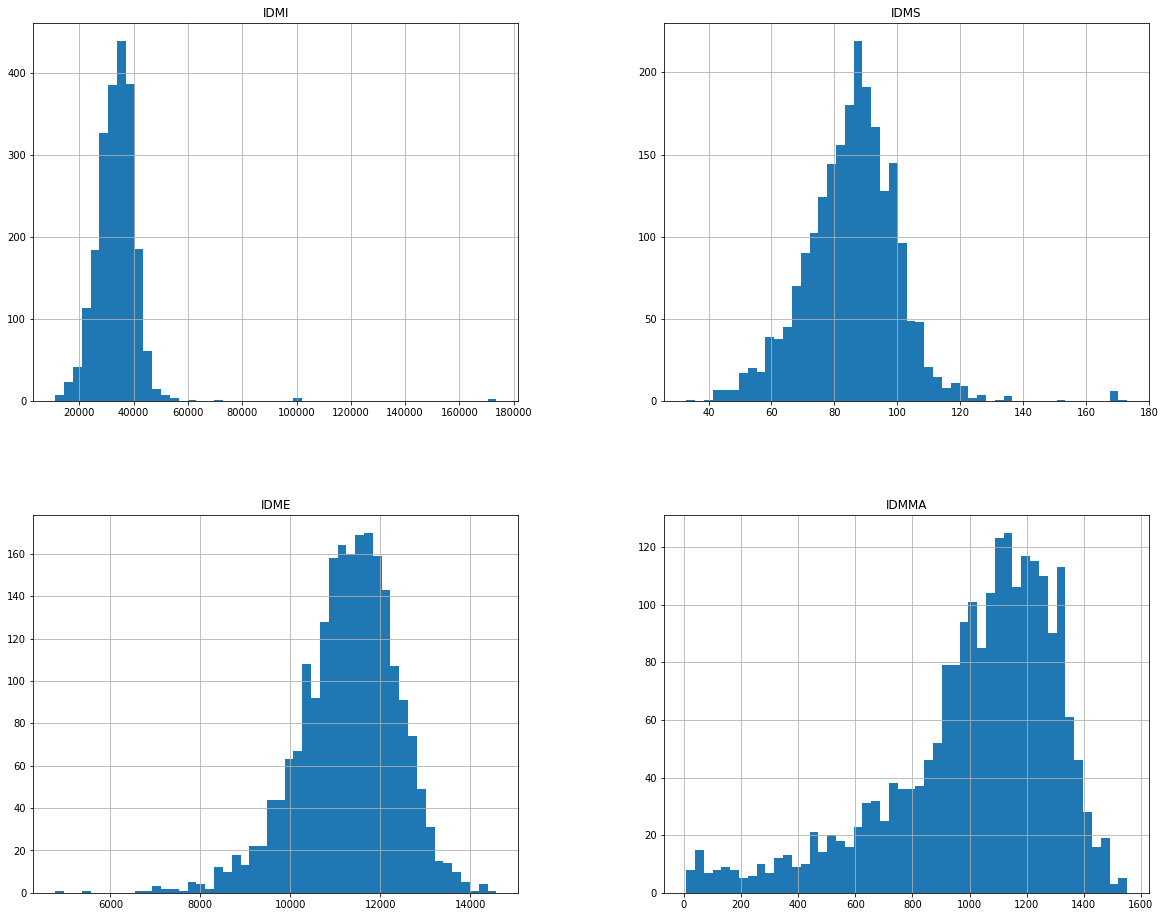

In [101]:
dfdnorm.hist(bins=50, figsize=(20,16))

In [102]:
#normalizamos los datos para poder sacar el IDM
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(dfdnorm)
print(df_mean_norm)


          IDMI      IDMS      IDME     IDMMA
0    -1.194169  1.296010  1.000977  1.329927
1    -0.632516 -0.132484  1.264675  0.965050
2    -0.148864  0.258877  0.691910  0.723932
3    -0.818166 -0.039709  1.187069  1.054574
4    -1.446302  0.636665  1.232532  1.010502
...        ...       ...       ...       ...
2186 -0.142703 -0.067740  0.141315  0.336552
2187 -0.145015  0.242482 -0.245366  0.008074
2188 -1.294684  1.170758  0.634276  0.887616
2189 -0.336321  0.112320  1.313903  0.994524
2190 -0.507076  0.049622 -0.459481 -0.208075

[2191 rows x 4 columns]


In [103]:
dffin = pd.DataFrame(columns = [ 'IDMI', 'IDMS', 'IDME', 'IDMMA','IDM'])
for i in range(len(df2.index)):
    municipio=df2.iat[i,3]
    IDMI=df_mean_norm.iat[i,0]
    IDMS=df_mean_norm.iat[i,1]
    IDME=df_mean_norm.iat[i,2]
    IDMMA=df_mean_norm.iat[i,3]
    print()
    IDM=(IDMI+IDMS+IDME+IDMMA)/4
    IDM=abs(IDM)
    print(IDM)
    dffin.loc[i]=[IDMI, IDMS,IDME,IDMMA,IDM]


0.6081861735818069

0.36618117463568556

0.38146374952622886

0.34594224993529

0.35834904327433215

0.35834904327433215

1.540869994102926

0.4985121194586336

0.3964623696436788

0.433736502284049

0.20748030929361078

0.2805796505017662

0.6573914338418714

0.5745603410748685

0.3180932411494616

0.6867346626423616

0.7662893910180668

0.6516185123684687

0.24249934076883292

0.5497173378710334

0.5497173378710334

0.5210613622540051

0.6739124569536868

0.6739124569536868

0.4746982358658791

0.6013400916888161

0.34232101645150326

0.3317008323885237

0.35601421228092556

0.2618829993947829

0.4433504192767119

0.3372714863155884

0.25678557856805995

0.1301327311572506

0.07810157607005325

1.4570873512635498

1.4570873512635498

1.4570873512635498

1.4570873512635498

0.4340972315465962

0.18597055028239048

0.18597055028239048

0.18597055028239048

0.20938358600057283

0.20938358600057283

0.8723138133036858

0.08373616088461136

0.12865611864073545

0.2222146127224751

0.2222

In [104]:
dffin.tail()

,IDMI,IDMS,IDME,IDMMA,IDM
2186,-0.142703,-0.067740,0.141315,0.336552,0.066856
2187,-0.145015,0.242482,-0.245366,0.008074,0.034956
2188,-1.294684,1.170758,0.634276,0.887616,0.349491
2189,-0.336321,0.112320,1.313903,0.994524,0.521106
2190,-0.507076,0.049622,-0.459481,-0.208075,0.281253


In [105]:
dffin.describe()

,IDMI,IDMS,IDME,IDMMA,IDM
count,2.191000e+03,2.191000e+03,2.191000e+03,2.191000e+03,2191.000000
mean,-4.674287e-15,-3.165776e-15,2.360600e-14,4.446314e-15,0.349061
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.319746
min,-2.569299e+00,-3.575550e+00,-5.936490e+00,-3.388820e+00,0.000195
25%,-5.192165e-01,-5.906233e-01,-5.606125e-01,-4.124282e-01,0.137759
50%,2.010170e-02,6.043301e-02,6.250787e-02,2.249655e-01,0.273677
75%,4.775573e-01,6.003357e-01,6.672135e-01,7.170283e-01,0.460076
max,1.585191e+01,5.919298e+00,2.995275e+00,1.803072e+00,3.990859


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f784ad282d0>,
      dtype=object)

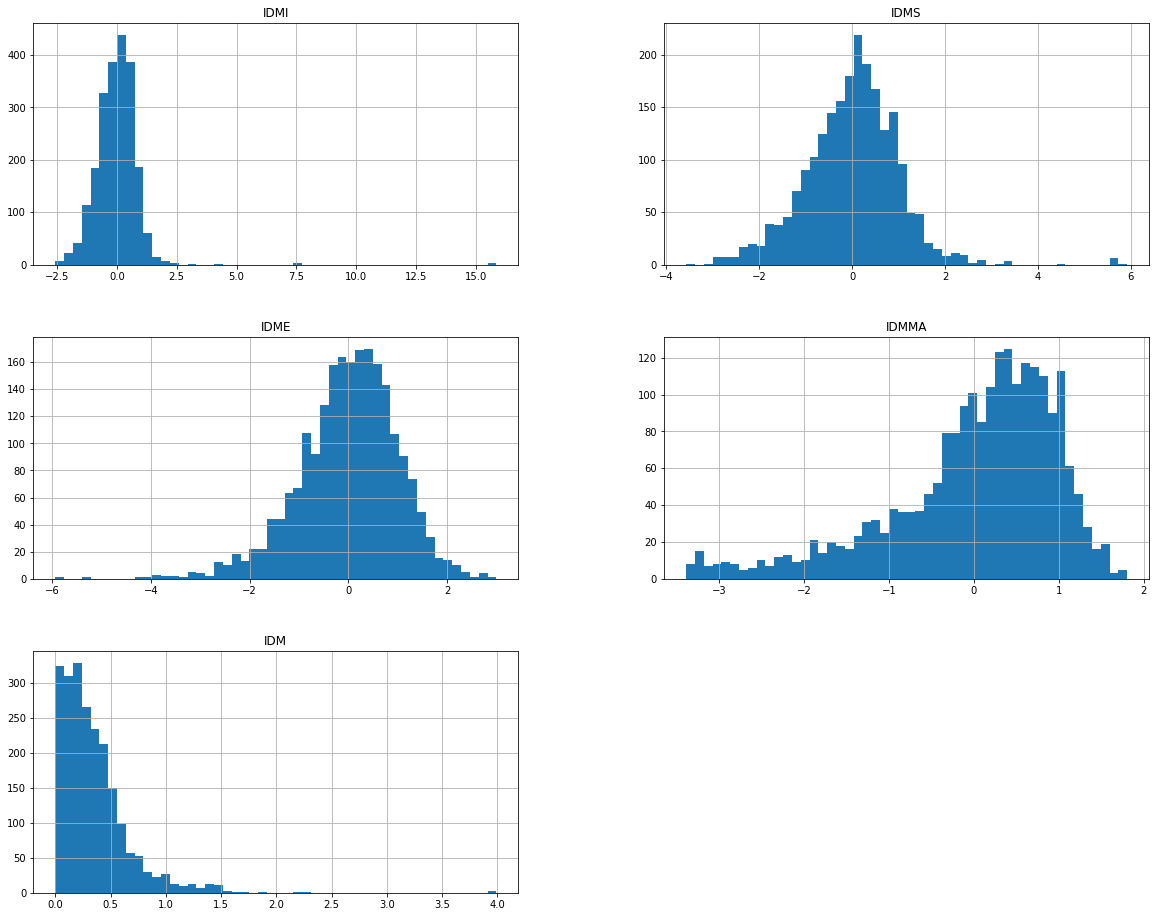

In [106]:
#distribucion de los diferentes indices
dffin.hist(bins=50, figsize=(20,16))

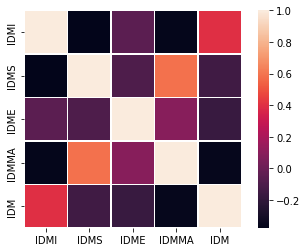

In [107]:
corr_matrix = dffin.corr()
sns.heatmap(corr_matrix, square=True, linewidths=0.5)

In [108]:
X = dffin[['IDMS', 'IDME', 'IDMI','IDMMA']]
y = dffin['IDM']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
IDMS,0.052265
IDME,-0.038523
IDMI,0.119718
IDMMA,-0.101876


In [110]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
39,0.434097,0.052994
880,0.169887,0.332601
391,0.099595,0.287845
1064,0.136174,0.377124
251,0.090851,0.498905
...,...,...
666,0.535182,0.199356
1992,0.162323,0.425774
1056,0.412688,0.401300
641,0.407192,0.261547


In [111]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error porcentual : %f" % (error*100))

Error porcentual : 26.202049


In [112]:
df_newmun = pd.DataFrame(np.array([[0.294684,0.170758,0.634276,0.887616]]),columns=['IDMI','IDMS','IDME','IDMMA'])
df_newmun

,IDMI,IDMS,IDME,IDMMA
0,0.294684,0.170758,0.634276,0.887616


In [113]:
regressor.predict(df_newmun)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0.34826941])

In [114]:
predicciones = regressor.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")
residuos_train= y_pred - y_test

[0.05299402 0.33260053 0.28784524]

El error (rmse) de test es: 0.262020491846115


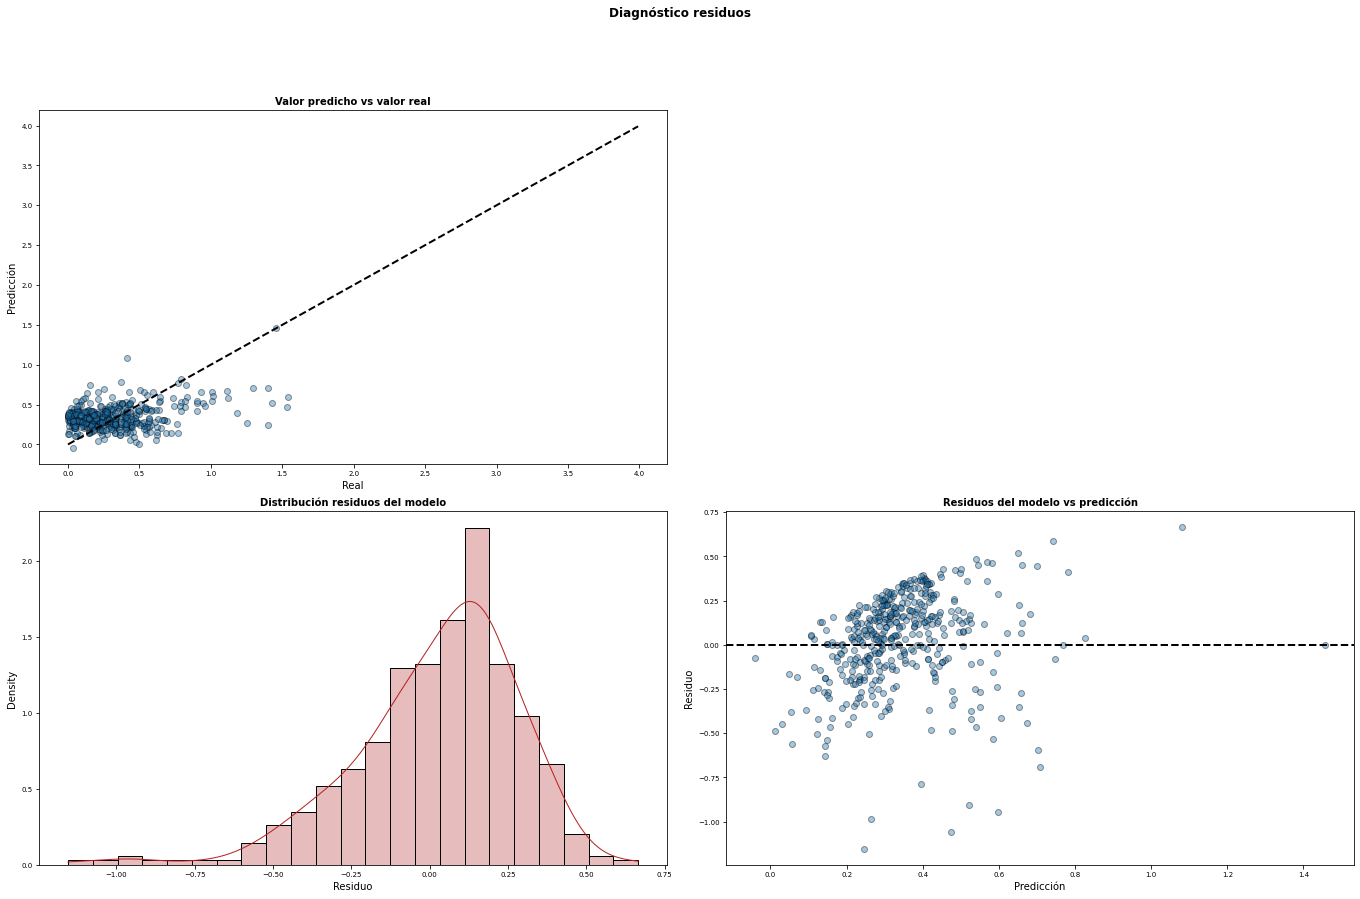

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(19, 18))

axes[0, 0].scatter(y_test, predicciones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)



axes[1, 1].scatter(predicciones, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[0,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");